# Project: Investigate a Dataset on No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#webliography">Webliography</a></li>
</ul>

<a id='intro'></a>
## Introduction
    This dataset is a collection of approx 100k medical appointments in Brazil and is focused on the question of whether or not the patients show up for their appointment


### Data Dictionary

**1. PatientId**: Identification of a patient

**2. AppointmentID**: Identification of each appointment

**3. Gender**: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

**4. ScheduledDay**: The day someone called or registered the appointment, this is before appointment of course.

**5. AppointmentDay**: The day of the actual appointment, when they have to visit the doctor.

**6. Age**: How old is the patient.

**7. Neighbourhood**: Where the appointment takes place.

**8. Scholarship**: True of False . Observation, this is a broad topic, consider reading this [article](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)

**9. Hipertension**: True or False

**10. Diabetes**: True or False

**11. Alcoholism**: True or False

**12. Handcap**: True or False

**13. SMS_received**: 1 or more messages sent to the patient.

**14. No-show**: True or False

For each of those variables from Hipertension to SMS_received:

1. 0 = False (or No)
2. 1 = True (or Yes)


In [1]:
#Importing packages for use

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**The following questons are planned to be answered within the analysis of this project:**

    Q1. What is the patient health designation breakdown of no-shows versus shows?
    
    Q2. What is the breakdown of no-shows versus shows by patients that received SMS reminders?
    
    Q3. Identify the average difference between Schedule Day and Appointment Day
    
    Q4. What is the overall showup v/s no showup rate of the appointments?
    
    Q5. Which Neighbourhood have the highest number of No-shows?
    
    Q6. Do appointment no-shows occur on specific days of the week?
    
    Q7. Identify trends in appointment shows v/s no shows over time?

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# reading the dataset from the csv file

df = pd.read_csv('no_show_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Summary Stats

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
print('The dimensions of the dataframe is: ',df.shape)

The dimensions of the dataframe is:  (110527, 14)


In [7]:
# Finding duplicate rows

print("Duplicate Rows are: ",df.duplicated().sum())

Duplicate Rows are:  0


In [8]:
# Finding missing values

print(df.isna().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


**There are no duplicate and missing values in the dataframe**

In [9]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

From the above query it is clear that there are 81 unique values in `Neighbourhood` and a total of 62299 `PatientId` (patient's) in the dataframe.

### Data Cleaning 

### 1. Cleaning Column Labels

**Here we convert all the column labels to lowercase making it easy to remember and be consistent.**

In [10]:
# Using rename() and lambda() to rename all the column lables

df.rename(columns = lambda x : x.lower(), inplace = True)

In [11]:
# Fixing Typos im the column names

df.rename(columns = {"no-show":"no_show", "hipertension":"hypertension", "handcap":"handicap"}, inplace = True)

Verifying column label changes

In [12]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

### 2. Inspecting and Fixing Data Types

*Schedule day and appointment day should be in date time format and i think there will be a relationship between the gap between both of them and the No-show relaiton*

In [13]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  float64            
 1   appointmentid   110527 non-null  int64              
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hypertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handicap        110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  no_show       

In [14]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**SInce time data is not available in `scheduleday` remove time data**

In [15]:
df['scheduledday'] = df['scheduledday'].apply(lambda x : x.strftime('%m-%d-%Y'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  float64            
 1   appointmentid   110527 non-null  int64              
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  object             
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hypertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handicap        110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  no_show       

**SInce time data is not available in `scheduleday` remove time data from `appointmentday`**

In [16]:
df['appointmentday'] = df['appointmentday'].apply(lambda x : x.strftime('%m-%d-%Y'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110527 non-null  float64
 1   appointmentid   110527 non-null  int64  
 2   gender          110527 non-null  object 
 3   scheduledday    110527 non-null  object 
 4   appointmentday  110527 non-null  object 
 5   age             110527 non-null  int64  
 6   neighbourhood   110527 non-null  object 
 7   scholarship     110527 non-null  int64  
 8   hypertension    110527 non-null  int64  
 9   diabetes        110527 non-null  int64  
 10  alcoholism      110527 non-null  int64  
 11  handicap        110527 non-null  int64  
 12  sms_received    110527 non-null  int64  
 13  no_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [17]:
# Verify changes

df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,04-29-2016,04-29-2016,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,04-29-2016,04-29-2016,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,04-29-2016,04-29-2016,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,04-29-2016,04-29-2016,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,04-29-2016,04-29-2016,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Converting date fields from string to datetime, to enable datetime functions and then converting date to day of week for report readability.**

In [18]:
# appointment_dow column for day of week analysis 
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

df['schedule_dow'] = df['scheduledday'].dt.strftime("%A")
df['appointment_dow'] = df['appointmentday'].dt.strftime("%A")
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dow,appointment_dow
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday


**Also it seems that theres something wrong in the `Age` data set, since minimun age (-1) is not possible**

In [19]:
# Check for any age value less than 0

df[df['age'] < 0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dow,appointment_dow
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,Monday,Monday


In [20]:
# Check for any age value equal to 0

df[df['age'] == 0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dow,appointment_dow
59,7.184428e+13,5638545,F,2016-04-29,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No,Friday,Friday
63,2.366233e+14,5628286,M,2016-04-27,2016-04-29,0,SÃO BENEDITO,0,0,0,0,0,0,No,Wednesday,Friday
64,1.885174e+14,5616082,M,2016-04-25,2016-04-29,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No,Monday,Friday
65,2.718818e+14,5628321,M,2016-04-27,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No,Wednesday,Friday
67,8.647128e+13,5639264,F,2016-04-29,2016-04-29,0,NOVA PALESTINA,0,0,0,0,0,0,No,Friday,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16,2016-06-01,0,RESISTÊNCIA,0,0,0,0,0,0,No,Monday,Wednesday
110346,5.577525e+12,5777724,M,2016-06-06,2016-06-08,0,RESISTÊNCIA,0,0,0,0,0,0,No,Monday,Wednesday
110454,6.142460e+11,5772400,F,2016-06-03,2016-06-03,0,RESISTÊNCIA,0,0,0,0,0,0,No,Friday,Friday
110460,4.321846e+13,5769545,F,2016-06-03,2016-06-03,0,RESISTÊNCIA,0,0,0,0,0,0,No,Friday,Friday


**Further investigating Age Column**

In [21]:
df.loc[(df['age'] <= 1) & (df['alcoholism'] == 1)]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dow,appointment_dow


*Patients whose age is less than a year cannot be alcoholic*

In [22]:
df.loc[(df['age'] <= 1) & (df['diabetes'] == 1)]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dow,appointment_dow
33912,1.543379e+14,5615584,M,2016-04-25,2016-05-02,1,GURIGICA,0,0,1,0,0,1,Yes,Monday,Monday


*It can be seen that patients can develop diabetes at a very early age*

In [23]:
df.loc[(df['age'] <= 1) & (df['scholarship'] == 1)]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dow,appointment_dow
1183,9.541438e+14,5638403,F,2016-04-29,2016-04-29,1,SÃO CRISTÓVÃO,1,0,0,0,0,0,No,Friday,Friday
1187,4.638353e+13,5606767,M,2016-04-20,2016-04-29,1,TABUAZEIRO,1,0,0,0,0,1,Yes,Wednesday,Friday
2229,3.955615e+14,5641075,M,2016-04-29,2016-04-29,1,SÃO BENEDITO,1,0,0,0,0,0,No,Friday,Friday
2676,8.724322e+13,5518758,M,2016-03-29,2016-04-29,0,SANTA TEREZA,1,0,0,0,0,1,No,Tuesday,Friday
5098,1.526536e+11,5664640,F,2016-05-05,2016-05-12,0,RESISTÊNCIA,1,0,0,0,0,0,No,Thursday,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101888,1.526536e+11,5691373,F,2016-05-12,2016-06-08,0,RESISTÊNCIA,1,0,0,0,0,1,No,Thursday,Wednesday
105272,8.263336e+12,5768440,M,2016-06-03,2016-06-03,1,ILHA DO PRÍNCIPE,1,0,0,0,0,0,No,Friday,Friday
106680,8.724322e+13,5659508,M,2016-05-04,2016-06-08,0,SANTA TEREZA,1,0,0,0,0,1,No,Wednesday,Wednesday
106704,8.725977e+14,5774554,M,2016-06-06,2016-06-06,1,SANTA TEREZA,1,0,0,0,0,0,No,Monday,Monday


*Over 134 people whose age is less than a year have scholarship*

In [24]:
df.loc[(df['age'] <= 1) & (df['hypertension'] == 1)]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dow,appointment_dow


*No hypertension for young people (age less than 1)*

In [25]:
df.loc[(df['age'] <= 1) & (df['handicap'] == 1)]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dow,appointment_dow
19993,4.971622e+14,5676323,F,2016-05-09,2016-05-12,1,BELA VISTA,0,0,0,0,1,0,No,Monday,Thursday
98247,3.647246e+14,5788682,F,2016-06-08,2016-06-08,0,JABOUR,0,0,0,0,1,0,No,Wednesday,Wednesday


*Its found that 2 people within age 1 are handicaped*

#### Replacing the values less than and equal to 0 in `age` with the mean of all age's

In [26]:
# calcultaing the mean of age column
# Replacing the values less than or equal to zero (IN THE AGE )

df.loc[df.age <= 0, 'age'] = df.age.mean()

**Converting no_show field from string to int so it can be plotted in charts**

In [27]:
df['no_show'] = df['no_show'].map({'Yes':1, 'No':0})

<a id='eda'></a>
## Exploratory Data Analysis

>### Creating dataframes

**1. Creating a derived column of time between schedule and appointment dates**

In [28]:
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['elapsed_days'] = df['appointmentday'] - df['scheduledday']

**2. Dataframe that holds all no-show records**

In [29]:
no_shows = df.query('no_show == 1')
days = no_shows['elapsed_days'].mean()
timeframe_nos = days / np.timedelta64(1, 'D')

**3. Dataframe that holds all show records**

In [30]:
shows = df.query('no_show == "0"')
days = shows['elapsed_days'].mean()
timeframe_shows = days / np.timedelta64(1, 'D')

**4. Creating a dataframe with ready-to-plot data types**

In [31]:
no_shows['no_show']='1'
no_shows['no_show'] = no_shows['no_show'].astype(int)

D:\Empty\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Empty\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


>### Reseach Questions and Visualizations

## Research Question 1:
## What is the patient health designation breakdown of no-shows versus shows?

**Creating 2 variables that contain data for people who showed and did not show for appointmnet respectively and have the following features**

- Alcoholism
- Handicap 
- Hypertension
- Diabetes

In [32]:
# Total No Shows
nos_by_health = no_shows.loc[(no_shows.alcoholism == 1) & (no_shows.handicap == 1) & (no_shows.hypertension == 1) & (no_shows.diabetes == 1)]
total_nos = nos_by_health.shape[0]

# Total Shows
shows_by_health = shows.loc[(shows.alcoholism == 1) & (shows.handicap == 1) & (shows.hypertension == 1) & (shows.diabetes == 1)]
total_shows = shows_by_health.shape[0]


Then we find the total & proportion for the following 4 features for people who showed

In [33]:
# Total Alcoholism
df_alc2 = shows.query('alcoholism == "1"')
dfa2 = df_alc2.shape[0]

# Proportion Alcoholism
a2 = float(dfa2 / total_shows)

# Total Handicap
df_han2 = shows.query('handicap == "1"')
dfb2 = df_han2.shape[0]

# Proportion Handicap
b2 = float(dfb2 / total_shows)

# Total Hypertension
df_hyp2 = shows.query('hypertension == "1"')
dfc2 = df_hyp2.shape[0]

# Proportion Hypertension
c2 = float(dfc2 / total_shows)

# Total Diabetes
df_dia2 = shows.query('diabetes == "1"')
dfd2 = df_dia2.shape[0]

# Proportion Diabetes
d2 = float(dfd2 / total_shows)

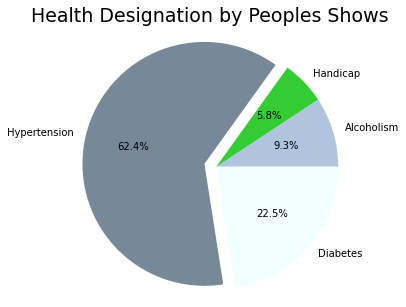

In [34]:
# Visualizing the data

labels = ['Alcoholism', 'Handicap', 'Hypertension', 'Diabetes']
sizes = [a2, b2, c2, d2]
colors = ['lightsteelblue', 'limegreen', 'lightslategray', 'azure']
explode = (0, 0, 0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Health Designation by Peoples Shows', fontsize=19)
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);

Here we find the total & proportion for the following 4 features for people who did not show

In [35]:
# Total Alcoholism
df_alc = no_shows.query('alcoholism == "1"')
dfa = df_alc.shape[0]

# Proportion Alcoholism
a = float(dfa / total_nos)

# Total Handicap
df_han = no_shows.query('handicap == "1"')
dfb = df_han.shape[0]

# Proportion Handicaped
b = float(dfb / total_nos)

# Total Hypertension
df_hyp = no_shows.query('hypertension == "1"')
dfc = df_hyp.shape[0]

# Proportion Hypertension
c = float(dfc / total_nos)

# Total Diabetes
df_dia = no_shows.query('diabetes == "1"')
dfd = df_dia.shape[0]

# Proportion Diabetes
d = float(dfd / total_nos)

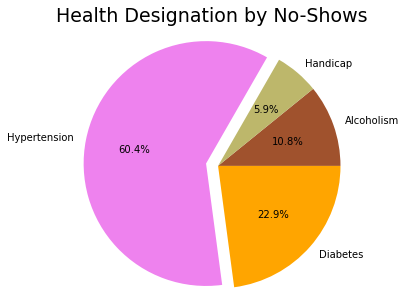

In [36]:
# Visualization

labels = ['Alcoholism', 'Handicap', 'Hypertension', 'Diabetes']
sizes = [a, b, c, d]
colors = ['sienna', 'darkkhaki', 'violet', 'orange']
explode = (0, 0, 0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Health Designation by No-Shows', fontsize=19)
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);

## Research Question 2: 
## What is the breakdown of no-shows versus shows by patients that received SMS reminders?

In [37]:
noshows_sms_count = no_shows.query('sms_received == 1')
a = noshows_sms_count.shape[0]

In [38]:
shows_sms_count = shows.query('sms_received == 1')
b  = shows_sms_count.shape[0]

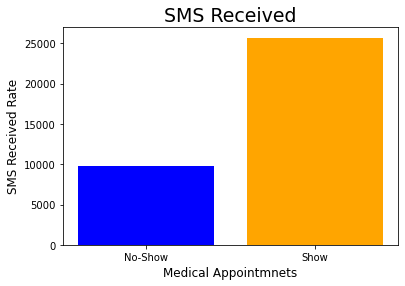

In [39]:
# visualtization

location = [1,2]
heights = [a,b]
labels = ["No-Show", "Show"]

plt.bar(location, heights, tick_label = labels, color = ["blue","orange"])
plt.title("SMS Received", fontsize=19)
plt.xlabel('Medical Appointmnets', fontsize=12)
plt.ylabel('SMS Received Rate', fontsize=12);

In [40]:
noshows_sms_count = no_shows.query('sms_received == 0')
c = noshows_sms_count.shape[0]

In [41]:
shows_sms_count = shows.query('sms_received == 0')
d  = shows_sms_count.shape[0]

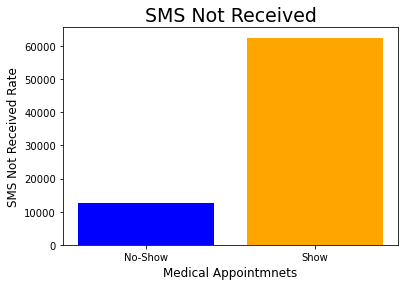

In [42]:
# visualtization

location = [1,2]
heights = [c,d]
labels = ["No-Show", "Show"]

plt.bar(location, heights, tick_label = labels, color = ["blue","orange"])
plt.title("SMS Not Received", fontsize=19)
plt.xlabel('Medical Appointmnets', fontsize=12)
plt.ylabel('SMS Not Received Rate', fontsize=12);

## Research Question 3: 
## Identify the average difference between Schedule Day and Appointment Day

Text(0.5, 0, 'Days between booking and appointment')

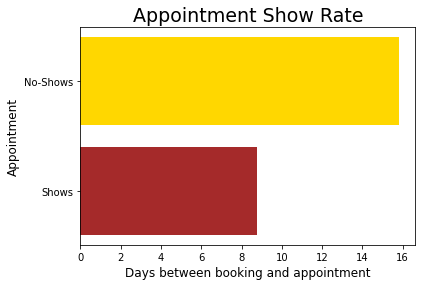

In [43]:
# Visualization

locations = [1, 2]
heights = [timeframe_shows, timeframe_nos]
labels = ['Shows', 'No-Shows']

plt.barh(locations, heights, tick_label = labels, color  = ["brown","gold"]);  #barh fetches a horizontal bar graph
plt.title("Appointment Show Rate",fontsize=19)
plt.ylabel("Appointment",fontsize=12)
plt.xlabel("Days between booking and appointment",fontsize=12)

## More Visulaizations of the dataset

`PatientID` and `AppointementID` are random numbers for each patient and appointment so it should be dropped or it will lead to misleadings

In [44]:
df.drop(['patientid','appointmentid'], axis = 1, inplace = True)

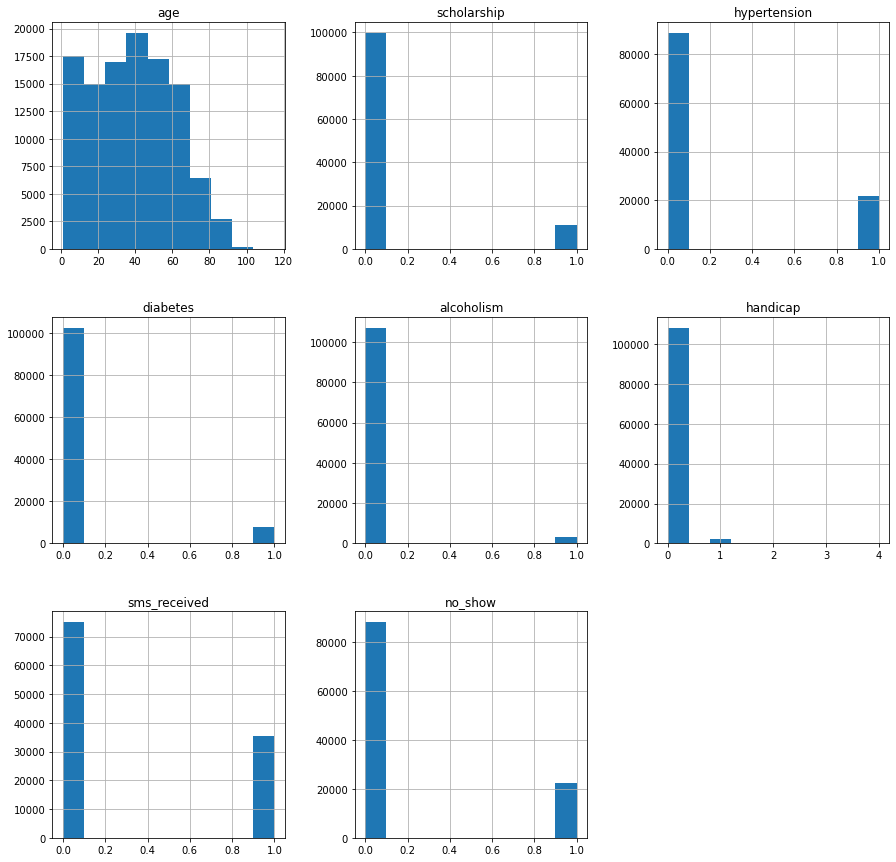

In [45]:
df.hist(figsize = (15,15));

- **Not many patients suffer from diseases like hypertension, diabetes, handicap**
- **The least fetures observed in people are handicap & alcoholism**

In [46]:
df.groupby(['no_show'], as_index=False).size().sort_values(by='no_show', ascending=False)

,no_show,size
1,1,22319
0,0,88208


In [47]:
df['no_show'].value_counts(normalize=True) * 100

0    79.806744
1    20.193256
Name: no_show, dtype: float64

**Approx 79.8% of the people turned up for the appointment and 20.1% did not show up on the appointment day**

In [48]:
# Creating mask for people who showedup for the appointment

showed = df["no_show"] == "No"
not_showed = df["no_show"] == "Yes"

df['showed'] = showed
df['not_showed'] = not_showed

In [49]:
# Which gender shows up more
df.groupby(['no_show', 'gender'], as_index=False).size()

,no_show,gender,size
0,0,F,57246
1,0,M,30962
2,1,F,14594
3,1,M,7725


### Relation between no-shows and diabetes

In [50]:
# For Diabetes

df.diabetes.value_counts()

0    102584
1      7943
Name: diabetes, dtype: int64

In [51]:
df.diabetes.value_counts(normalize = True) * 100

0    92.813521
1     7.186479
Name: diabetes, dtype: float64

**Only 7% of the people suffer from diabetes**

In [52]:
df.groupby(["no_show","diabetes"], as_index = False).size()

,no_show,diabetes,size
0,0,0,81695
1,0,1,6513
2,1,0,20889
3,1,1,1430


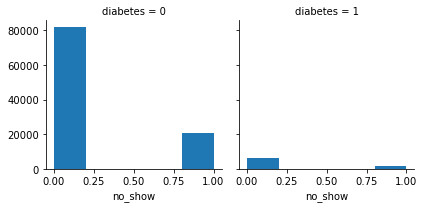

In [53]:
dg = sns.FacetGrid(df, col = 'diabetes')
dg.map(plt.hist, 'no_show', bins=5);

**More of the people came as per their appointment, in the 7% of people with diabetes**

### Relation between no-shows and hypertension

In [54]:
# For hypertension

df.hypertension.value_counts(normalize = True) * 100

0    80.275408
1    19.724592
Name: hypertension, dtype: float64

In [55]:
df.groupby(["no_show","hypertension"], as_index = False).size()

,no_show,hypertension,size
0,0,0,70179
1,0,1,18029
2,1,0,18547
3,1,1,3772


**Approx 19.7% of people in the enitre dataset suffer from hypertension**

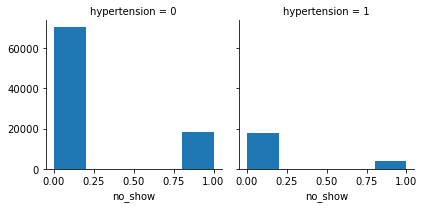

In [56]:
hyp_g = sns.FacetGrid(df, col = 'hypertension')
hyp_g.map(plt.hist, 'no_show', bins = 5);

### Relation between no-shows and alcoholism

In [57]:
# For Alcoholism

df.alcoholism.value_counts()

0    107167
1      3360
Name: alcoholism, dtype: int64

In [58]:
df.alcoholism.value_counts(normalize=True) * 100

0    96.960019
1     3.039981
Name: alcoholism, dtype: float64

**Only 3.03 % of the people are alcoholic**

In [59]:
df.groupby(["no_show","alcoholism"], as_index=False).size()

,no_show,alcoholism,size
0,0,0,85525
1,0,1,2683
2,1,0,21642
3,1,1,677


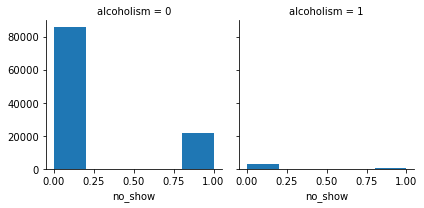

In [60]:
alc_g = sns.FacetGrid(df, col = 'alcoholism')
alc_g.map(plt.hist, 'no_show', bins = 5);

**From the 3% of the people who are alcoholic, most of them are found commited to their appointments.**
**As less as 677 of all the alcohoic people did not showup**

### Relation between no-shows and scholarship

In [61]:
# For Scholarships

df.scholarship.value_counts()

0    99666
1    10861
Name: scholarship, dtype: int64

In [62]:
df.scholarship.value_counts(normalize = True) * 100

0    90.173442
1     9.826558
Name: scholarship, dtype: float64

In [63]:
df.groupby(["no_show","scholarship"], as_index = False).size()

,no_show,scholarship,size
0,0,0,79925
1,0,1,8283
2,1,0,19741
3,1,1,2578


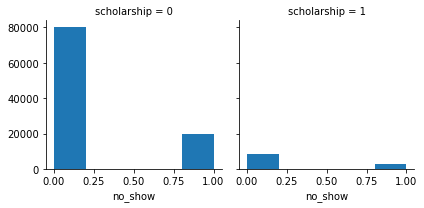

In [64]:
sch_g = sns.FacetGrid(df, col = "scholarship")
sch_g.map(plt.hist, 'no_show', bins = 5);

**About 9.8% had scholarship. More people showedup who had a scholarship than those who did not show despite of having scholarship** 

### Relation between no-shows and handicap

In [65]:
# For Handicap

df.handicap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

In [66]:
df.handicap.value_counts(normalize  = True) * 100

0    97.972441
1     1.847512
2     0.165570
3     0.011762
4     0.002714
Name: handicap, dtype: float64

In [67]:
df.groupby(["no_show","handicap"], as_index = False).size()

,no_show,handicap,size
0,0,0,86374
1,0,1,1676
2,0,2,146
3,0,3,10
4,0,4,2
5,1,0,21912
6,1,1,366
7,1,2,37
8,1,3,3
9,1,4,1


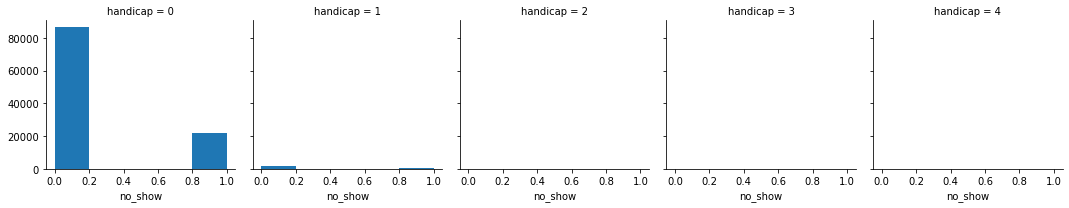

In [68]:
han_g = sns.FacetGrid(df, col = "handicap")
han_g.map(plt.hist, 'no_show', bins = 5);

**It can be seen that more than 97% of the people are not handicaped. So `handicap`does not have a major influence on people turning up for the appoitnment.**

## Research Question 4: 
## What is the overall showup v/s no showup rate of the appointments

Making a *Pie Chart* to plot the percentages

In [69]:
new_df = df.groupby('no_show')['no_show'].agg(['count'])
new_df.reset_index(inplace=True)
new_df.columns = ['appt_status', 'total']
new_df.iloc[0,0] = "Show"
new_df.iloc[1,0] = "No Show"

In [70]:
# Proportions
nos_prop = new_df.iloc[0,1] / (new_df.iloc[0,1] + new_df.iloc[1,1])
shows_prop = new_df.iloc[1,1] / (new_df.iloc[0,1] + new_df.iloc[1,1])

new_df['proportion'] = [nos_prop, shows_prop]
new_df.head()

,appt_status,total,proportion
0,Show,88208,0.798067
1,No Show,22319,0.201933


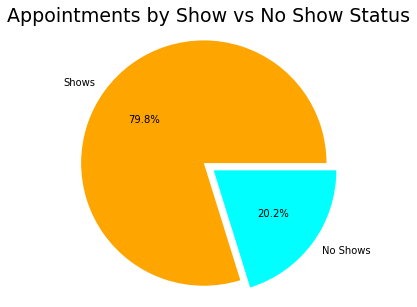

In [71]:
labels = ['Shows', 'No Shows']
sizes = [nos_prop, shows_prop]
colors = ['orange', 'cyan']
explode = (0, 0.1)

# The plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Appointments by Show vs No Show Status',fontsize=19)
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);

**The above figure clearly shows approx 79.8% showed for their appointmnets. A Pie chart here helps us to show the totlal proportion of no-shows data amongst the total appointmens booked**

## Research Question 5: 
## Which Neighbourhood have the highest number of No-shows?

In [72]:
showed_by_hood = shows.groupby("neighbourhood")["no_show"].count().reset_index(name="count").sort_values("count", ascending=False)

showed_by_hood.head(10)

,neighbourhood,count
37,JARDIM CAMBURI,6252
42,MARIA ORTIZ,4586
58,RESISTÊNCIA,3525
38,JARDIM DA PENHA,3246
65,SANTA MARTHA,2635
10,CENTRO,2631
35,ITARARÉ,2591
77,TABUAZEIRO,2559
68,SANTO ANTÔNIO,2262
8,BONFIM,2223


**These are the top 10 Neighbourhoods by show**

In [73]:
did_not_show_by_hood = no_shows.groupby("neighbourhood")["no_show"].count().reset_index(name="count").sort_values("count", ascending=False)

did_not_show_by_hood.head(10)

,neighbourhood,count
38,JARDIM CAMBURI,1465
43,MARIA ORTIZ,1219
36,ITARARÉ,923
58,RESISTÊNCIA,906
10,CENTRO,703
40,JESUS DE NAZARETH,696
39,JARDIM DA PENHA,631
9,CARATOÍRA,591
77,TABUAZEIRO,573
8,BONFIM,550


**These are the top 10 Neighbourhoods by no show**

## Research Question 6:
## Do appointment no-shows occur on specific days of the week?

**No shows data for everyday of the week**

In [74]:
noshow_mon = no_shows.query('appointment_dow == "Monday"')
noshow_mon = noshow_mon['appointment_dow'].count()

noshow_tue = no_shows.query('appointment_dow == "Tuesday"')
noshow_tue = noshow_tue['appointment_dow'].count()

noshow_wed = no_shows.query('appointment_dow == "Wednesday"')
noshow_wed = noshow_wed['appointment_dow'].count()

noshow_thu = no_shows.query('appointment_dow == "Thursday"')
noshow_thu = noshow_thu['appointment_dow'].count()

noshow_fri = no_shows.query('appointment_dow == "Friday"')
noshow_fri = noshow_fri['appointment_dow'].count()

noshow_sat = no_shows.query('appointment_dow == "Saturday"')
noshow_sat = noshow_sat['appointment_dow'].count()

noshow_sun = no_shows.query('appointment_dow == "Sunday"')
noshow_sun = noshow_sun['appointment_dow'].count()

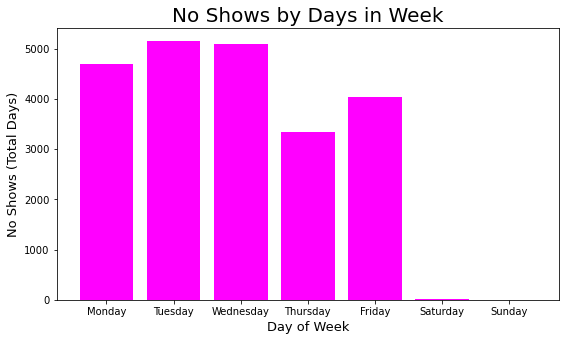

In [75]:
# Visualtization

labels = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
location = [1,2,3,4,5,6,7]
heights= [noshow_mon, noshow_tue, noshow_wed, noshow_thu, noshow_fri, noshow_sat, noshow_sun]
plt.bar(location, heights, tick_label = labels, color = 'magenta')
plt.title('No Shows by Days in Week',fontsize=20)
plt.xlabel('Day of Week',fontsize=13)
plt.ylabel('No Shows (Total Days)', fontsize=13)
fig = plt.gcf()
fig.set_size_inches(9,5);

## Research question 7:
## Identify trends in appointment shows v/s no shows over time

In [76]:
# Creating dataframe and grouping wiht respect to appointmentday & no_show
df_line = df.groupby(["appointmentday","no_show"])["no_show"].count().reset_index(name="appt_count")
df_line.head()

,appointmentday,no_show,appt_count
0,2016-04-29,0,2602
1,2016-04-29,1,633
2,2016-05-02,0,3515
3,2016-05-02,1,861
4,2016-05-03,0,3425


In [77]:
# Querying shows data and groupby appointmnetday
df_line_shows = df_line.query('no_show == 0')
df_line_shows.groupby('appointmentday').count()
df_line_shows.head()

,appointmentday,no_show,appt_count
0,2016-04-29,0,2602
2,2016-05-02,0,3515
4,2016-05-03,0,3425
6,2016-05-04,0,3195
8,2016-05-05,0,3466


In [78]:
# # Querying no shows data and groupby appointmnetday
df_line_noshows = df_line.query('no_show == 1')
df_line_noshows.groupby('appointmentday').count()
df_line_noshows.head()

,appointmentday,no_show,appt_count
1,2016-04-29,1,633
3,2016-05-02,1,861
5,2016-05-03,1,831
7,2016-05-04,1,973
9,2016-05-05,1,807


In [79]:
shows_line_date = df_line_shows['appointmentday']
shows_line_count = df_line_shows['appt_count']

In [80]:
noshows_line_date = df_line_noshows['appointmentday']
noshows_line_count = df_line_noshows['appt_count']

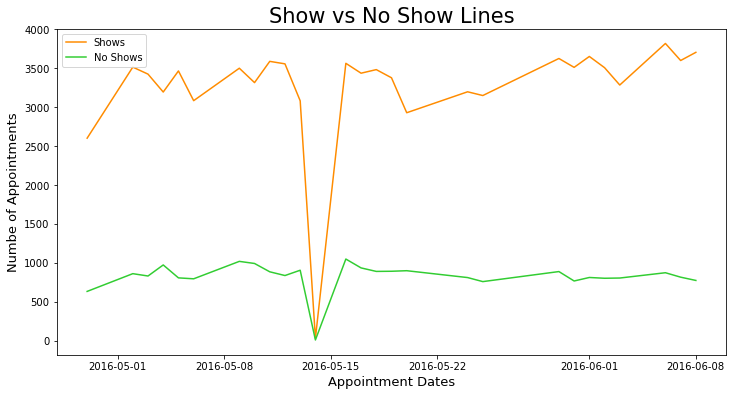

In [81]:
# Visulaization

shows_line, = plt.plot(shows_line_date, shows_line_count, label='Shows', color='darkorange')
noshows_line, = plt.plot(noshows_line_date, noshows_line_count, label='No Shows', color='limegreen')

plt.title('Show vs No Show Lines',fontsize=21)
plt.xlabel('Appointment Dates',fontsize=13)
plt.ylabel('Numbe of Appointments',fontsize=13)
plt.legend(handles = [shows_line, noshows_line])
fig = plt.gcf()
fig.set_size_inches(12,6);

<a id='conclusions'></a>
## Conclusions

**In the Medical Appointment No Shows dataset:**

- *From  the pie chart it is clear that appoximate of 80% of the patinets showed up for their scheduled appountmnets*


- *From the pie charts for patient's health designation, Hypertension is the largest category among the other in the shows & no-shows segments.*


- *SMS Received does not seem to play a major role, as the proportion of shows with no sms received was double more than the proportion of shows with a sms received.*


- *In the investigation for average difference between schedule day and appointment day it was observed that no-shows had the mean difference of 16 days when compared with shows of people for appointmnets with mean difference of 9 days.*


- *Analysis was done for Neighbourhoods where appointments took place and it was found that JARDIM CAMBURI & MARIA ORTIZ are the top two places for shows & no-show category. This can be due to the population at these places.*


- *From the analysis for most no-shows on varios days of the week, appointmnets had most no-shows on Tuesday. Appointmnets at early days of the week had righer no-show rate. Further analysis can be performed to understand the influence of days on no-shows*


- *In the trend for appointments show v/s no-show overtime, Shows have a very good increasing trend than no-shows of appointments. Further analysis can help determine the factors of the no-show rates*


### Limitations:
> External data features such as traffic, geographical location and weather would make the analysis better and help predict the no-show appointment. Hence the analysis becomes limited.

> Patient(s) with most appointmnets and repetitve no-shows can be removed to imporve the quality of analysis, especially to undersatnd the effect of health features on no-shows. This step was not done in the analysis but can help us to improve the overall analysis.

<a id='webliography'></a>
## Webliography

- [Pandas Docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)
- [matplotlib](https://matplotlib.org/3.3.3/contents.html)
- [Stackoverflow](https://stackoverflow.com/)
- [Uadcity Knowledge](https://knowledge.udacity.com/?nanodegree=nd002&page=1&project=107&rubric=107)
- [Seaborn](https://seaborn.pydata.org/index.html)
- [Python matplotlib Bar Chart](https://pythonspot.com/matplotlib-bar-chart/)